# Hyperspectral Image Analysis - Getting Started

In [2]:
%%capture
!pip install --upgrade git+git://github.com/abraia/multiple.git

import os
from dotenv import load_dotenv
load_dotenv()

if not os.getenv('ABRAIA_KEY'):
    #@markdown <a href="https://abraia.me/console/settings" target="_blank">Get your ABRAIA_KEY</a>
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_KEY=$abraia_key

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from multiple.multiple import Multiple
from multiple import hsi
 
multiple = Multiple()

OSError: /home/jorge/Projects/public/multiple/venv/lib/python3.8/site-packages/multiple/cie-cmf_1nm.txt not found.

## Download and read the HSI data

In [4]:
%%capture
#@markdown <a href="https://abraia.me/console/gallery" target="_blank">Upload your hyperspectral data</a>
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
!wget http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
multiple.upload('PaviaU.mat')
multiple.upload('PaviaU_gt.mat')

In [6]:
class_labels = {'1': 'Asphalt',
                '2': 'Meadows',
                '3': 'Gravel',
                '4': 'Trees',
                '5': 'Painted metal sheets',
                '6': 'Bare Soil',
                '7': 'Bitumen',
                '8': 'Self Blocking Bricks',
                '9': 'Shadows'}

cube = multiple.load_mat('PaviaU.mat')
gt = multiple.load_mat('PaviaU_gt.mat')

cube.shape, gt.shape

((610, 340, 103), (610, 340))

## Basic visualization of HSI data

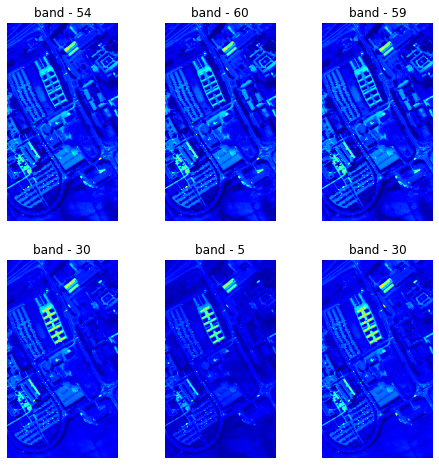

In [7]:
fig = plt.figure(figsize=(8, 8))
for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(cube.shape[2])
    plt.title(f'band - {q}')
    plt.imshow(cube[:,:,q], cmap='jet')
    plt.axis('off')
plt.show()

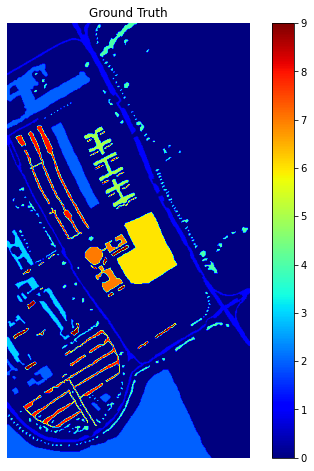

In [8]:
plt.figure(figsize=(8, 8))
plt.title('Ground Truth')
plt.imshow(gt, cmap='jet')
plt.axis('off')
plt.colorbar()

## Dimensionality reduction using PCA

The dimensions of the data are reduced from 103 to 3 as it makes easier to understands patterns in the data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


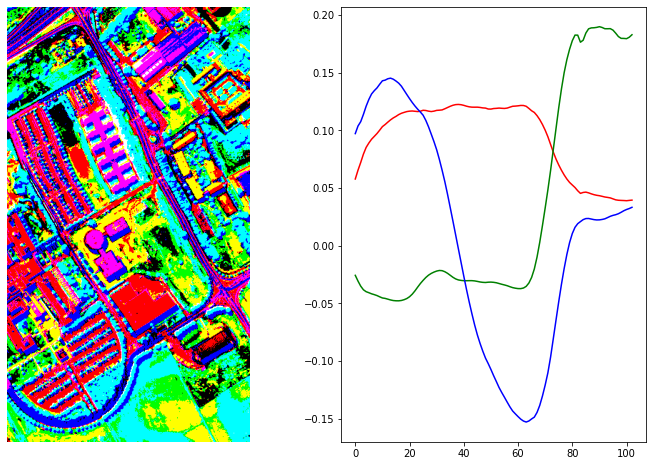

In [9]:
img, spectre = hsi.decor_bands(cube)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
colors = ['r', 'g', 'b']
[plt.plot(component, colors[k]) for k, component in enumerate(spectre)]
plt.show()